In [1]:
#installation des packages nécessaires
!pip install pandas

In [2]:
# Importation des packages utiles
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime

In [3]:
# Chargement de la base de données et mise en forme
df = pd.read_csv("ENSAE-Data 2023.csv",sep=";")
for s in df.columns:
    if (s!='Date'):
        df[s] = df[s].apply(lambda x: x.replace(',', '.'))
        df[s] = pd.to_numeric(df[s],errors = 'coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df.drop(df[df.isnull().any(axis=1)].index, inplace=True)
df=df.reset_index(drop=True)
df.set_index('Date', inplace = True)
df.head(3)

,IDRUSD,TJSUSD,KGSUSD,TNDUSD,PENUSD,KZTUSD,INRUSD,RUBUSD,GELUSD,HNLUSD,CNYUSD,MNTUSD,THBUSD,ZARUSD,JODUSD,MXNUSD,XOFUSD,COPUSD
Date,,,,,,,,,,,,,,,,,,
2001-01-05,0.10526,0.4545,0.0207,0.7407,0.28461,0.0069,0.0214,0.03516,0.5025,0.0662,0.1208,0.9124,0.02313,0.13302,1.4085,0.10252,0.1451,0.04458
2001-01-06,0.10526,0.4545,0.0207,0.7407,0.28461,0.0069,0.0214,0.03516,0.5025,0.0662,0.1208,0.9124,0.02313,0.13302,1.4085,0.10252,0.1451,0.04458
2001-01-07,0.10526,0.4545,0.0207,0.7407,0.28461,0.0069,0.0214,0.03516,0.5025,0.0662,0.1208,0.9124,0.02313,0.13302,1.4085,0.10252,0.1451,0.04458


In [4]:
# Calcul des rendements (arithmétiques)
def calcul_rendement (base,tf):
    df_return=base.copy().reset_index()
    if tf == 'd':
        A = 100*base.pct_change()
        A.drop(A.index[0], axis=0, inplace=True)  
        return A
    if tf == 'm':
        df_return['Date']=df_return['Date'].dt.strftime('%Y-%m') 
        A=df_return.groupby('Date').mean()
        for k in A.index:
            B=df_return[df_return['Date']==k]
            for col in A.columns:
                 A[col][k]=100*(B[col].iloc[-1]-B[col].iloc[0])/B[col].iloc[0]
        return A

In [5]:
# Daily return
daily_return=calcul_rendement(df, 'd')
daily_return.sample(3)

,IDRUSD,TJSUSD,KGSUSD,TNDUSD,PENUSD,KZTUSD,INRUSD,RUBUSD,GELUSD,HNLUSD,CNYUSD,MNTUSD,THBUSD,ZARUSD,JODUSD,MXNUSD,XOFUSD,COPUSD
Date,,,,,,,,,,,,,,,,,,
2008-06-22,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-10-24,-0.217299,0.0,-0.469484,-0.015681,-0.212943,0.0,0.000000,-0.031427,0.000000,0.000000,-0.006248,-0.208131,0.129235,-0.036832,0.000000,-0.090838,-0.101471,-0.190608
2019-10-04,0.080637,0.0,0.000000,-0.114155,-0.165710,0.0,0.284131,0.717080,0.059294,0.246914,0.000000,-0.026660,0.360426,0.681705,0.106345,0.945626,0.059737,0.872516


## Statistiques sommaires

In [6]:
#Statistiques sommaires pour chaque devise
daily_return.describe()

,IDRUSD,TJSUSD,KGSUSD,TNDUSD,PENUSD,KZTUSD,INRUSD,RUBUSD,GELUSD,HNLUSD,CNYUSD,MNTUSD,THBUSD,ZARUSD,JODUSD,MXNUSD,XOFUSD,COPUSD
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,-0.004364,-0.018160,-0.005182,-0.009106,-0.000732,-0.010811,-0.006257,-0.006826,-0.002466,-0.005555,0.002644,-0.013521,0.003941,-0.005959,0.000093,-0.006304,0.003428,-0.007207
std,0.526717,0.435653,0.619602,0.477204,0.279190,0.811745,0.351258,0.906101,0.477048,0.331519,0.151493,0.390726,0.326256,0.909317,0.130974,0.591880,0.601877,0.641150
min,-7.877189,-12.541254,-14.388489,-5.473071,-3.055511,-21.568627,-3.879171,-20.313790,-12.647652,-9.106529,-1.807004,-9.038512,-4.739813,-8.732985,-1.670527,-6.925769,-6.554878,-5.854271
25%,-0.126152,0.000000,0.000000,-0.152742,-0.058493,0.000000,-0.064966,-0.124778,-0.018193,0.000000,-0.007572,0.000000,-0.086177,-0.311941,0.000000,-0.170944,-0.171234,-0.167657
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.111508,0.000000,0.000000,0.130153,0.053461,0.000000,0.075341,0.128941,0.033941,0.000000,0.013671,0.000000,0.096955,0.349214,0.000000,0.202433,0.163577,0.159942
max,9.395898,14.339623,20.168067,5.562385,3.645650,9.859155,3.669725,17.019774,5.343511,10.018904,2.052640,8.788225,3.209853,12.267860,1.386420,4.976027,7.014682,7.887917


## Matrice de corrélation

In [19]:
# Fontion qui prend en argument une liste de devises et renvoit la matrice de corrélation associée à ces devises avec comme indication le coefficient de corrélation suivi de la p-value qui renseigne sur la significativité de ce coefficient

import scipy
from scipy.stats import pearsonr

def correlation_matrix(base, tf, curr_list=None):
    if curr_list is None:
        curr_list=base.columns
    rend=calcul_rendement(base[curr_list],tf)
    plt.figure(figsize=(len(curr_list),len(curr_list)))
    corr_matrix = rend[curr_list].corr()
    pval = rend[curr_list].corr(method=lambda x, y: pearsonr(x, y)[1])
    mask = np.triu(np.ones_like(rend[curr_list].corr(), dtype=bool))
    # Créer la matrice contenant les paires de valeurs
    corr_pairs = np.empty_like(corr_matrix, dtype=object)
    for i in range(corr_matrix.shape[0]):
        for j in range(corr_matrix.shape[1]):
            value = corr_matrix.values[i, j]
            if np.isnan(value):
                corr_pairs[i, j] = '-'
            else:
                corr_pairs[i, j] = "{:.2f}\n{:.2f}".format(value, pval.values[j, i])
    # Afficher la matrice de corrélation avec les paires de valeurs
    sns.heatmap(corr_matrix, mask=mask, annot=corr_pairs, center=0,fmt='', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 18-len(curr_list)/2, 'color': 'black'})
    plt.title('Matrice de corrélation', fontsize=13, fontweight="bold")
    plt.show()

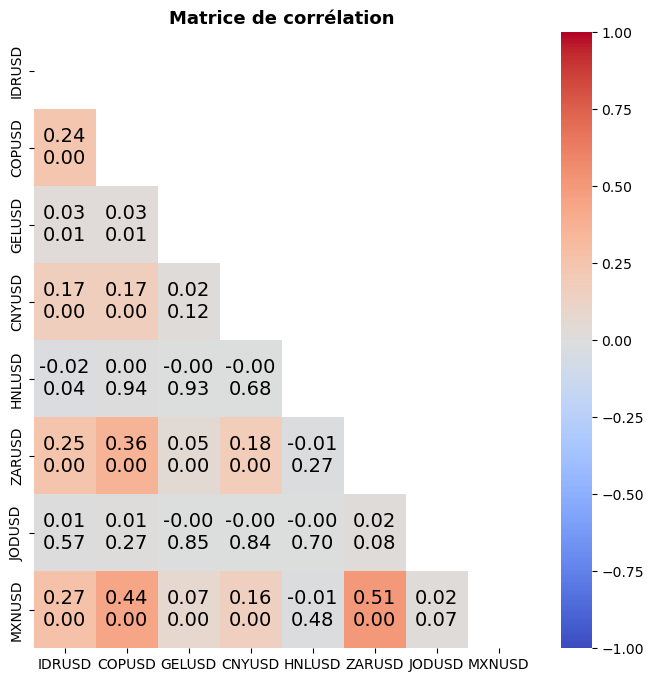

In [20]:
curr_list=['IDRUSD','COPUSD','GELUSD','CNYUSD','HNLUSD','ZARUSD','JODUSD', 'MXNUSD'] #Liste des devises pour lesquelles on souhaite obtenir la matrice de corrélation

correlation_matrix(df, 'd', curr_list) # Exécuter correlation_matrix() pour obtenir la matrice de corrélation pour toutes les devises de la base

## Calcul de VaR Monthly 5% historique et Expected Shortfall Monthly 5% historique

In [ ]:
# Monthly return
monthly_return=calcul_rendement(df, 'm')

In [18]:
# Generate a list of weights
import random
l = random.sample(range(1, 50), len(monthly_return.columns))
w = [[ round(i/sum(l) , 3) for i in l]]
weights = pd.DataFrame(w, index = ['weights'], columns = monthly_return.columns)
weights

,IDRUSD,TJSUSD,KGSUSD,TNDUSD,PENUSD,KZTUSD,INRUSD,RUBUSD,GELUSD,HNLUSD,CNYUSD,MNTUSD,THBUSD,ZARUSD,JODUSD,MXNUSD,XOFUSD,COPUSD
weights,0.053,0.015,0.03,0.055,0.013,0.091,0.004,0.049,0.076,0.072,0.087,0.04,0.051,0.084,0.044,0.074,0.078,0.082


### VaR Monthly 5% historique 

In [19]:
def ValueAtRisk (data, alpha = 0.05): 
    # Calcul des PnL (Profits & Losses) mensuels du portefeuille
    global PnL
    PnL = np.zeros(len(data))
    for j in data.columns:
        PnL = weights[j][0]*data[j]+PnL
    return PnL.quantile(q= alpha, interpolation = 'higher')

### Expected Shortfall Monthly 5% historique

In [20]:
def ExpectedShortFall (data, alpha = 0.05):
    VaR = ValueAtRisk(data, alpha = alpha )
    return PnL[PnL.lt(VaR)].mean()

In [23]:
print('\033[1m' + ' VaR Monthly 5% historique: ' + '\033[0m', round(ValueAtRisk(monthly_return) , 2),'% \n',
      '\033[1m' + 'Expected Shortfall Monthly 5% historique: ' + '\033[0m', round(ExpectedShortFall(monthly_return) , 2),'%')

 VaR Monthly 5% historique:  -2.6 % 
 Expected Shortfall Monthly 5% historique:  -3.96 %
